In [46]:
library(tidyverse)
library(dplyr)
library("readxl")
library("stringr")
library(psych)
library(ggplot2)
library(reshape2)
library(scales)
setwd("D:/Study/DATA419/Group Project/")

# Follower Rank
## Follower Rank - The most popular group

In [47]:
follower_matrix1 <- read.csv("artists_info.csv", row.names = 1)
follower_matrix1 <- follower_matrix1[-c(1,4,5)]
follower_matrix1

,screen_name,followers_count
,<fct>,<int>
1,BLACKPINK,6531762
2,justinbieber,114200324
3,BTS_twt,46354472
4,marshmello,2431732
5,Eminem,22676979
6,edsheeran,17615939
7,taylorswift13,90368646
8,billieeilish,6820950
9,katyperry,108881521


Plotting

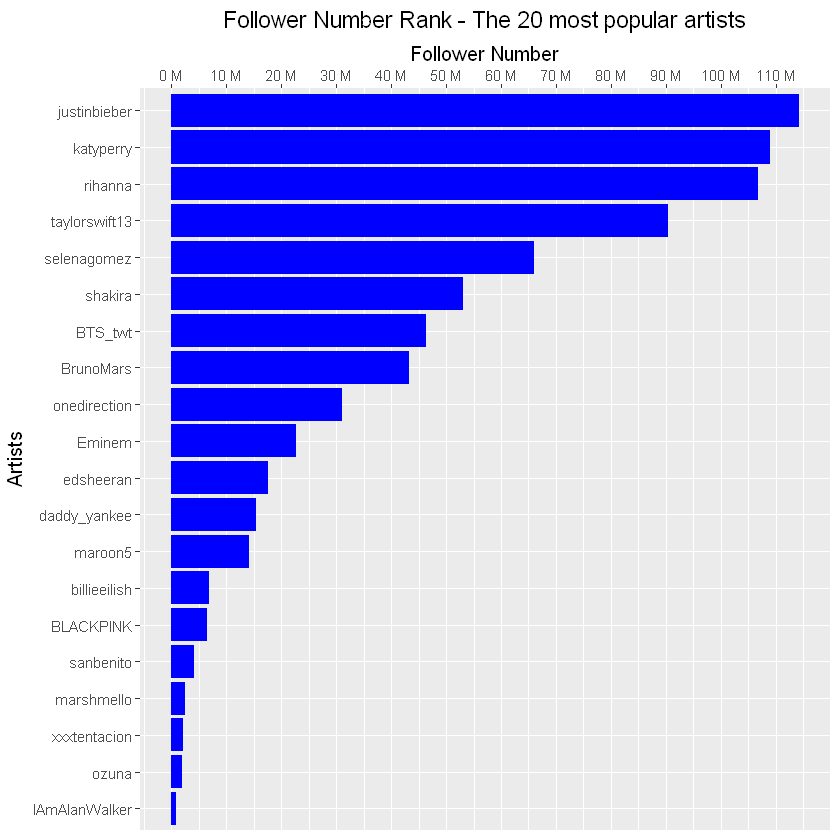

In [64]:
follower_matrix1 %>%
  mutate(screen_name = fct_reorder(screen_name, followers_count)) %>%
ggplot(aes(x=followers_count)) +
  theme_grey() +
  geom_col(aes(y=screen_name), fill='blue') +
  #geom_bar(aes(y=followers_count), fill='blue', stat="identity", position = "dodge") +
  ylab("Artists") +
  xlab("Follower Number") +
  theme(axis.title.x = element_text(size=12)) +
  #theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  theme(axis.title.y = element_text(size=12, vjust=2)) +
  theme(plot.title = element_text(size=14, hjust = 0.5)) +
  ggtitle("Follower Number Rank - The 20 most popular artists") +
  scale_x_continuous(position = "top", labels = label_number(suffix = " M", scale = 1e-6), breaks = seq(0, 120000000, by = 10000000))

## Follower Rank - The less popular group

In [49]:
follower_matrix2 <- read.csv("artists2_info.csv", row.names = 1)
follower_matrix2 <- follower_matrix2[-c(1,4,5)]
follower_matrix2

,screen_name,followers_count
,<fct>,<int>
1,FKAtwigs,469259
2,andygrammer,148050
3,c_woodzofficial,365232
4,beforeyouexit,208746
5,rrr001222,118978
6,CAVETOWN,308193
7,clairo,517917
8,oneruel,198491
9,Olivertree,255125


Plotting

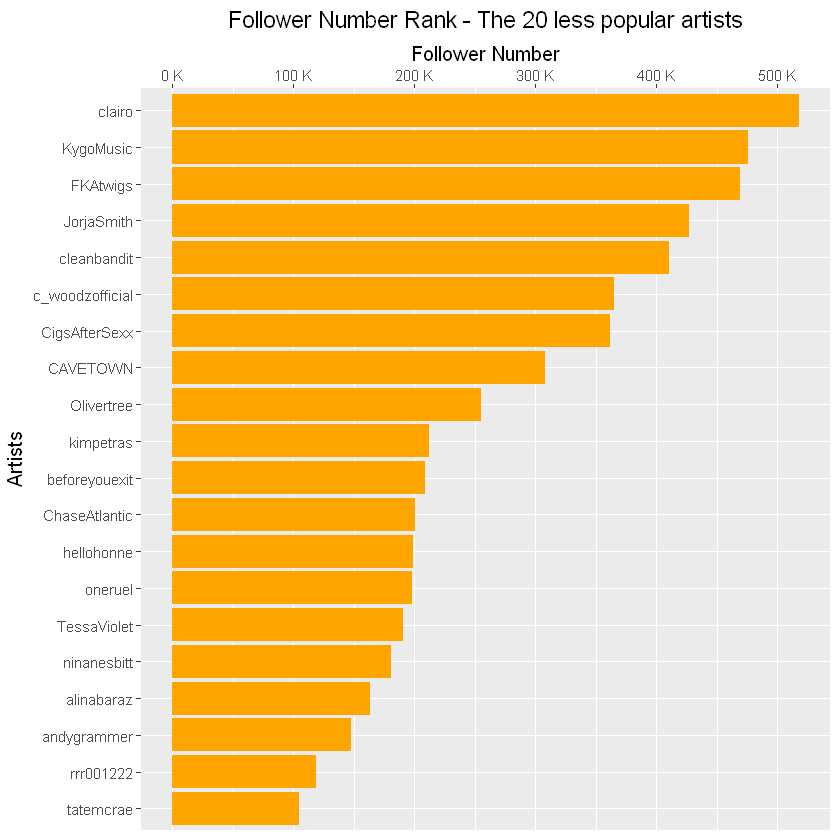

In [66]:
follower_matrix2 %>%
  mutate(screen_name = fct_reorder(screen_name, followers_count)) %>%
ggplot(aes(x=followers_count)) +
  theme_grey() +
  geom_col(aes(y=screen_name), fill='orange') +
  #geom_bar(aes(y=followers_count), fill='blue', stat="identity", position = "dodge") +
  ylab("Artists") +
  xlab("Follower Number") +
  theme(axis.title.x = element_text(size=12)) +
  #theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  theme(axis.title.y = element_text(size=12, vjust=2)) +
  theme(plot.title = element_text(size=14, hjust = 0.5)) +
  ggtitle("Follower Number Rank - The 20 less popular artists") +
  scale_x_continuous(position = "top", labels = label_number(suffix = " K", scale = 1e-3), breaks = seq(0, 600000, by = 100000))

# Engagement Analysis
## Pre-processing

In [7]:
follower_matrix1$group <- c("20 Most Popular")
follower_matrix2$group <- c("20 Less Popular")
follower_matrix1
follower_matrix2

,screen_name,followers_count,group
,<fct>,<int>,<chr>
1,BLACKPINK,6531762,20 Most Popular
2,justinbieber,114200324,20 Most Popular
3,BTS_twt,46354472,20 Most Popular
4,marshmello,2431732,20 Most Popular
5,Eminem,22676979,20 Most Popular
6,edsheeran,17615939,20 Most Popular
7,taylorswift13,90368646,20 Most Popular
8,billieeilish,6820950,20 Most Popular
9,katyperry,108881521,20 Most Popular


,screen_name,followers_count,group
,<fct>,<int>,<chr>
1,FKAtwigs,469259,20 Less Popular
2,andygrammer,148050,20 Less Popular
3,c_woodzofficial,365232,20 Less Popular
4,beforeyouexit,208746,20 Less Popular
5,rrr001222,118978,20 Less Popular
6,CAVETOWN,308193,20 Less Popular
7,clairo,517917,20 Less Popular
8,oneruel,198491,20 Less Popular
9,Olivertree,255125,20 Less Popular


In [8]:
follower_matrix <- rbind(follower_matrix1, follower_matrix2)
follower_matrix["average_like"] = 0
follower_matrix["average_comment"] = 0
follower_matrix["average_retweet"] = 0
follower_matrix["average_quote"] = 0
follower_matrix
colnames(follower_matrix)
rownames(follower_matrix)
glimpse(follower_matrix)

screen_name,followers_count,group,average_like,average_comment,average_retweet,average_quote
<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
BLACKPINK,6531762,20 Most Popular,0,0,0,0
justinbieber,114200324,20 Most Popular,0,0,0,0
BTS_twt,46354472,20 Most Popular,0,0,0,0
marshmello,2431732,20 Most Popular,0,0,0,0
Eminem,22676979,20 Most Popular,0,0,0,0
edsheeran,17615939,20 Most Popular,0,0,0,0
taylorswift13,90368646,20 Most Popular,0,0,0,0
billieeilish,6820950,20 Most Popular,0,0,0,0
katyperry,108881521,20 Most Popular,0,0,0,0


[1] "screen_name"     "followers_count" "group"           "average_like"   
[5] "average_comment" "average_retweet" "average_quote"

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40"

Rows: 40
Columns: 7
$ screen_name     <fct> BLACKPINK, justinbieber, BTS_twt, marshmello, Eminem, ~
$ followers_count <int> 6531762, 114200324, 46354472, 2431732, 22676979, 17615~
$ group           <chr> "20 Most Popular", "20 Most Popular", "20 Most Popular~
$ average_like    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ average_comment <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ average_retweet <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ average_quote   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~


Count the average of like/comment/quote/retweet number

In [9]:
setwd("D:/Study/DATA419/Group Project/Twitter/engagement_data/")

i <- 1
n <- nrow(follower_matrix)
while(i <= n) {
    #print(str_c(str_c(follower_matrix[i,"screen_name"]),".csv"))
    artist_data_matrix <- read.csv(str_c(str_c(follower_matrix[i,"screen_name"]),".csv"), row.names = 1)
    artist_data_matrix <- artist_data_matrix[-c(5)]
    follower_matrix[i,"average_retweet"] <- mean(artist_data_matrix$retweet_count)
    follower_matrix[i,"average_like"] <- mean(artist_data_matrix[artist_data_matrix$like_count != 0,]$like_count)
    follower_matrix[i,"average_comment"] <- mean(artist_data_matrix[artist_data_matrix$reply_count != 0,]$reply_count)
    follower_matrix[i,"average_quote"] <- mean(artist_data_matrix[artist_data_matrix$quote_count != 0,]$quote_count)
    i <- i + 1
}
follower_matrix$group <- factor(follower_matrix$group, levels = c("20 Most Popular", "20 Less Popular"))
follower_matrix

screen_name,followers_count,group,average_like,average_comment,average_retweet,average_quote
<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
BLACKPINK,6531762,20 Most Popular,1.399773e+05,3372.647059,33051.18000,4113.058824
justinbieber,114200324,20 Most Popular,3.836398e+04,1055.142857,5371.14000,633.000000
BTS_twt,46354472,20 Most Popular,1.884529e+06,60587.268293,490850.55102,45099.731707
marshmello,2431732,20 Most Popular,2.840907e+03,83.837209,268.10000,98.382353
Eminem,22676979,20 Most Popular,3.789943e+04,1076.972973,3884.88000,763.621622
edsheeran,17615939,20 Most Popular,3.328020e+03,60.163265,310.56000,61.530612
taylorswift13,90368646,20 Most Popular,3.952794e+05,13947.612245,64436.86000,22977.061224
billieeilish,6820950,20 Most Popular,1.894619e+04,437.187500,1462.82000,421.687500
katyperry,108881521,20 Most Popular,9.584191e+03,403.446809,992.92000,214.574468


## Retweet statistics

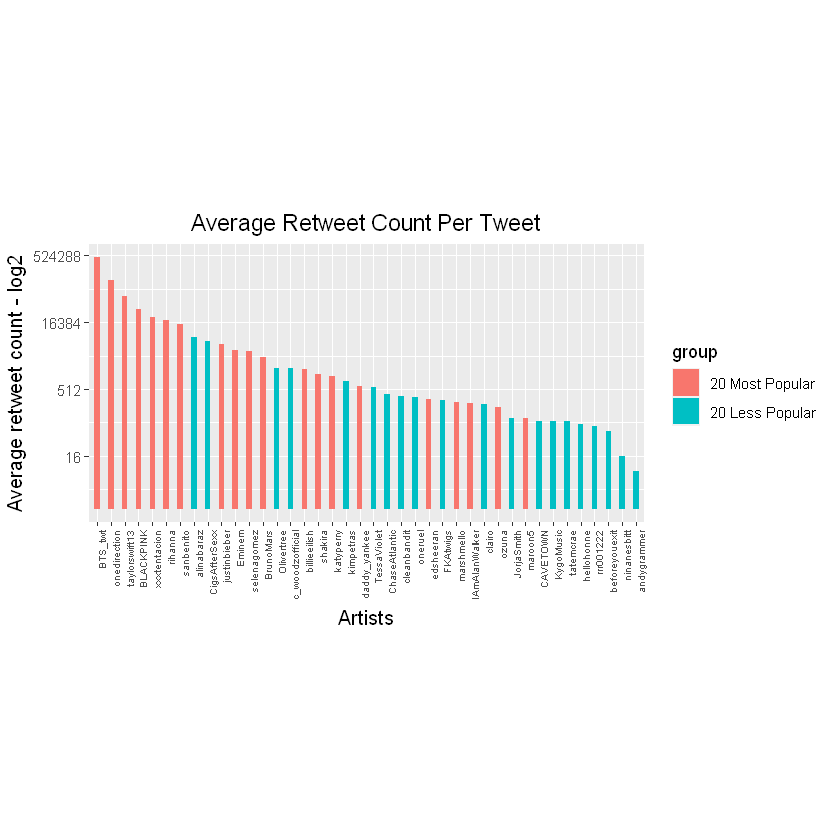

In [90]:
follower_matrix %>%
  mutate(screen_name = fct_reorder(screen_name, desc(average_retweet))) %>%
ggplot(aes(x=screen_name)) +
  theme_grey() +
  geom_col(aes(y=average_retweet, fill=group), width=0.4) +
  #scale_y_log10() +
  #geom_bar(aes(y=followers_count), fill='blue', stat="identity", position = "dodge") +
  xlab("Artists") +
  ylab("Average retweet count - log2") +
  theme(axis.title.x = element_text(size=12)) +
  theme(axis.text.x = element_text(size=6, angle = 90, vjust = 1, hjust = 1)) +
  theme(axis.title.y = element_text(size=12, vjust=2)) +
  theme(plot.title = element_text(size=14, hjust = 0.5)) +
  theme(aspect.ratio=1/2) +
  ggtitle("Average Retweet Count Per Tweet") +
  scale_y_continuous(trans = 'log2')
  #scale_y_continuous(labels = label_number(suffix = " K", scale = 1e-3), breaks = seq(0, 500000, by = 100000))  

Per Follower

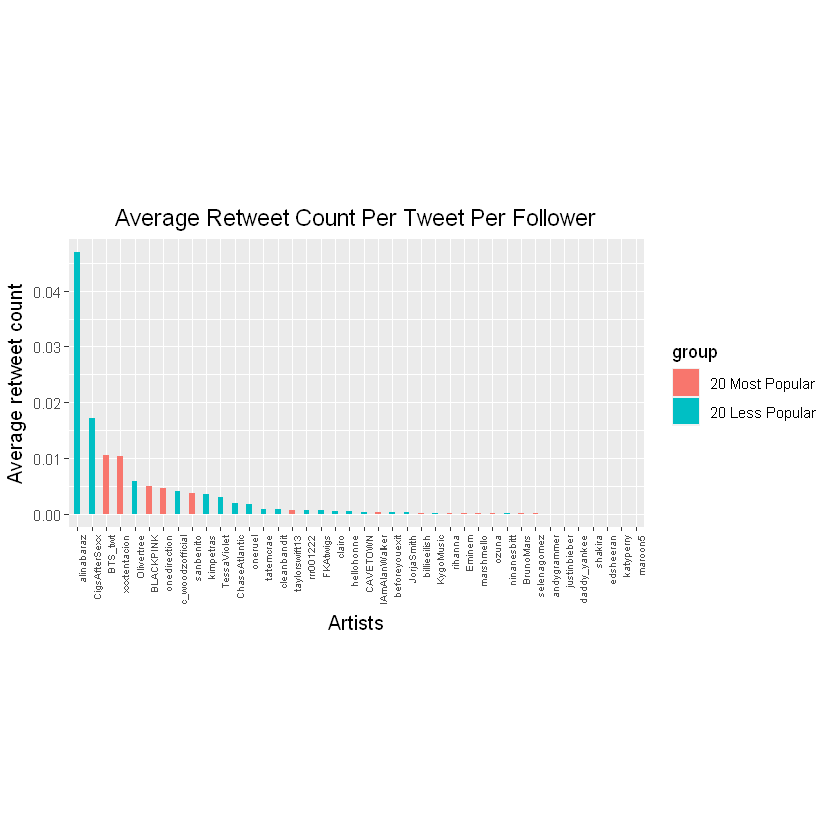

In [77]:
follower_matrix %>%
  mutate(screen_name = fct_reorder(screen_name, desc(average_retweet/followers_count))) %>%
ggplot(aes(x=screen_name)) +
  theme_grey() +
  geom_col(aes(y=average_retweet/followers_count, fill=group), width=0.4) +
  #scale_y_log10() +
  #geom_bar(aes(y=followers_count), fill='blue', stat="identity", position = "dodge") +
  xlab("Artists") +
  ylab("Average retweet count") +
  theme(axis.title.x = element_text(size=12)) +
  theme(axis.text.x = element_text(size=6, angle = 90, vjust = 1, hjust = 1)) +
  theme(axis.title.y = element_text(size=12, vjust=2)) +
  theme(plot.title = element_text(size=14, hjust = 0.5)) +
  theme(aspect.ratio=1/2) +
  ggtitle("Average Retweet Count Per Tweet Per Follower") #+
  #scale_y_continuous(trans = 'log2')
  #scale_y_continuous(labels = label_number(suffix = " K", scale = 1e-3), breaks = seq(0, 500000, by = 100000))  

## Comment statistics

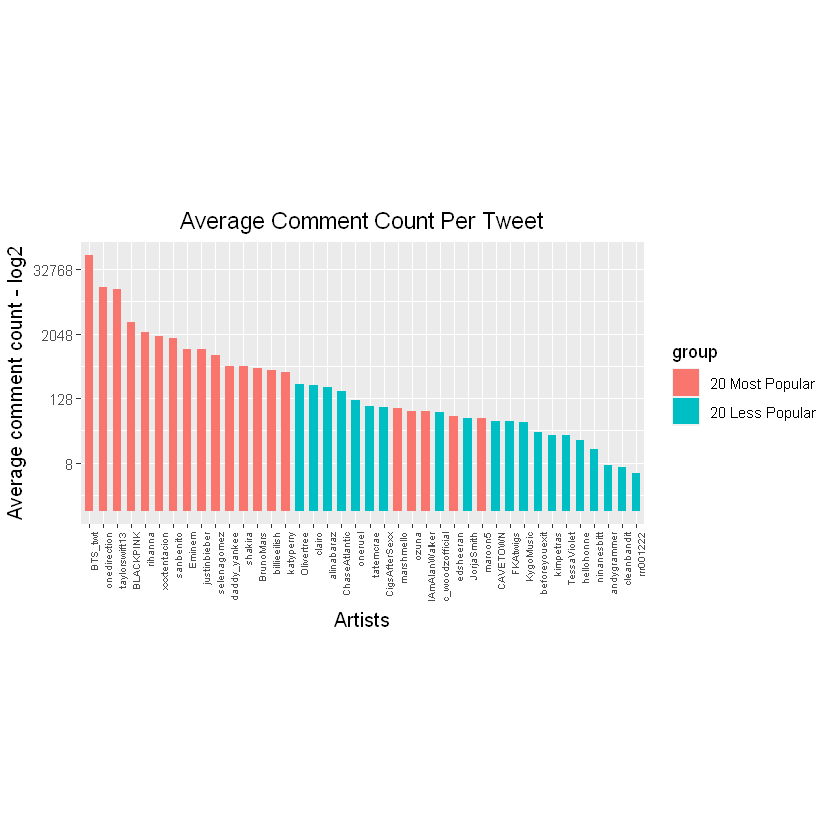

In [76]:
follower_matrix %>%
  mutate(screen_name = fct_reorder(screen_name, desc(average_comment))) %>%
ggplot(aes(x=screen_name)) +
  theme_grey() +
  geom_col(aes(y=average_comment, fill=group), width=0.6) +
  #scale_y_log10() +
  #geom_bar(aes(y=followers_count), fill='blue', stat="identity", position = "dodge") +
  xlab("Artists") +
  ylab("Average comment count - log2") +
  theme(axis.title.x = element_text(size=12)) +
  theme(axis.text.x = element_text(size=6, angle = 90, vjust = 1, hjust = 1)) +
  theme(axis.title.y = element_text(size=12, vjust=2)) +
  theme(plot.title = element_text(size=14, hjust = 0.5)) +
  theme(aspect.ratio=1/2) +
  ggtitle("Average Comment Count Per Tweet") +
  scale_y_continuous(trans = 'log2')
  #scale_y_continuous(labels = label_number(suffix = " K", scale = 1e-3), breaks = seq(0, 500000, by = 100000))  

Per Follower

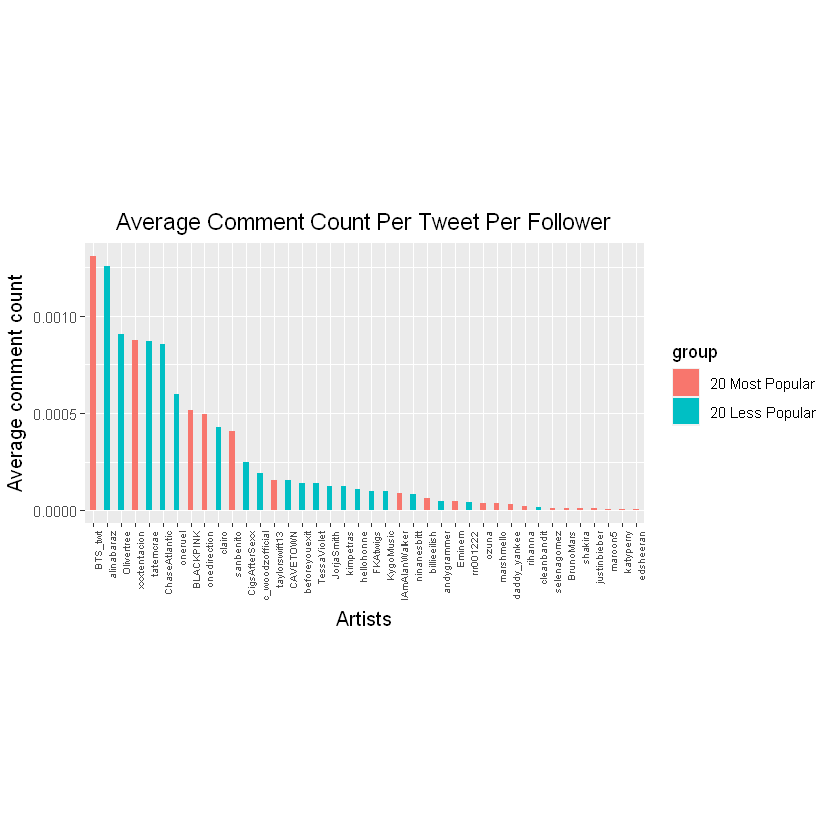

In [95]:
follower_matrix %>%
  mutate(screen_name = fct_reorder(screen_name, desc(average_comment/followers_count))) %>%
ggplot(aes(x=screen_name)) +
  theme_grey() +
  geom_col(aes(y=average_comment/followers_count, fill=group), width=0.4) +
  #scale_y_log10() +
  #geom_bar(aes(y=followers_count), fill='blue', stat="identity", position = "dodge") +
  xlab("Artists") +
  ylab("Average comment count") +
  theme(axis.title.x = element_text(size=12)) +
  theme(axis.text.x = element_text(size=6, angle = 90, vjust = 1, hjust = 1)) +
  theme(axis.title.y = element_text(size=12, vjust=2)) +
  theme(plot.title = element_text(size=14, hjust = 0.5)) +
  theme(aspect.ratio=1/2) +
  ggtitle("Average Comment Count Per Tweet Per Follower") +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE), breaks = seq(0, 0.0015, by = 0.0005))  

## Like statistics

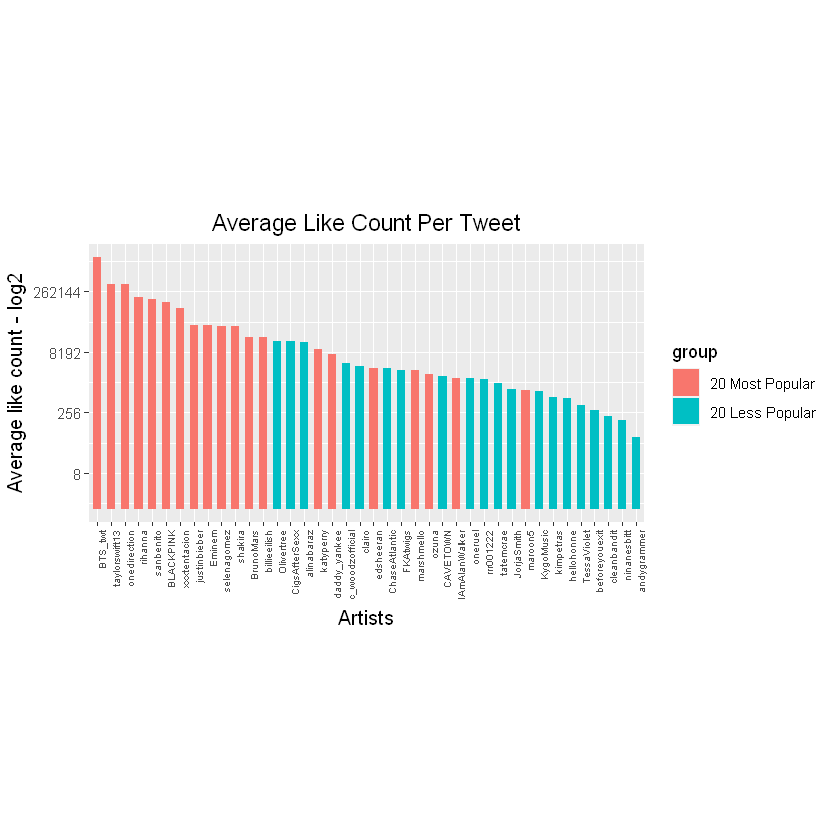

In [94]:
follower_matrix %>%
  mutate(screen_name = fct_reorder(screen_name, desc(average_like))) %>%
ggplot(aes(x=screen_name)) +
  theme_grey() +
  geom_col(aes(y=average_like, fill=group), width=0.6) +
  #scale_y_log10() +
  #geom_bar(aes(y=followers_count), fill='blue', stat="identity", position = "dodge") +
  xlab("Artists") +
  ylab("Average like count - log2") +
  theme(axis.title.x = element_text(size=12)) +
  theme(axis.text.x = element_text(size=6, angle = 90, vjust = 1, hjust = 1)) +
  theme(axis.title.y = element_text(size=12, vjust=2)) +
  theme(plot.title = element_text(size=14, hjust = 0.5)) +
  theme(aspect.ratio=1/2) +
  ggtitle("Average Like Count Per Tweet") +
  scale_y_continuous(trans = 'log2')
  #scale_y_continuous(labels = label_number(suffix = " K", scale = 1e-3), breaks = seq(0, 500000, by = 100000))  

Per Follower

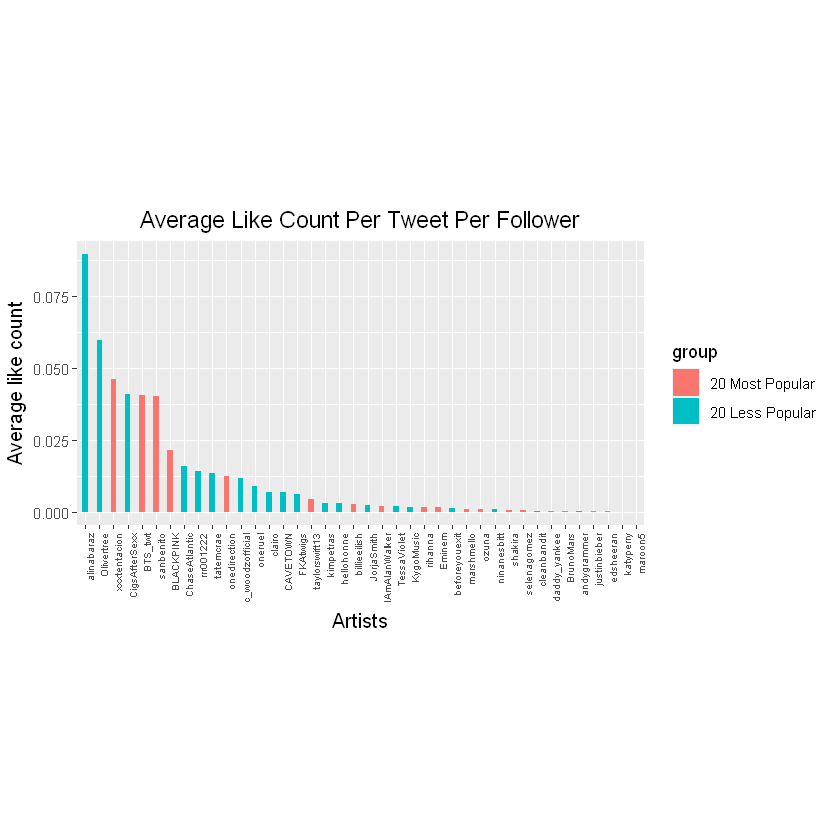

In [93]:
follower_matrix %>%
  mutate(screen_name = fct_reorder(screen_name, desc(average_like/followers_count))) %>%
ggplot(aes(x=screen_name)) +
  theme_grey() +
  geom_col(aes(y=average_like/followers_count, fill=group), width=0.4) +
  #scale_y_log10() +
  #geom_bar(aes(y=followers_count), fill='blue', stat="identity", position = "dodge") +
  xlab("Artists") +
  ylab("Average like count") +
  theme(axis.title.x = element_text(size=12)) +
  theme(axis.text.x = element_text(size=6, angle = 90, vjust = 1, hjust = 1)) +
  theme(axis.title.y = element_text(size=12, vjust=2)) +
  theme(plot.title = element_text(size = 14, hjust = 0.5)) +
  theme(aspect.ratio=1/2) +
  ggtitle("Average Like Count Per Tweet Per Follower") #+
  #scale_y_continuous(trans = 'log2')
  #scale_y_continuous(labels = label_number(suffix = " K", scale = 1e-3), breaks = seq(0, 500000, by = 100000))  

## Quote statistics

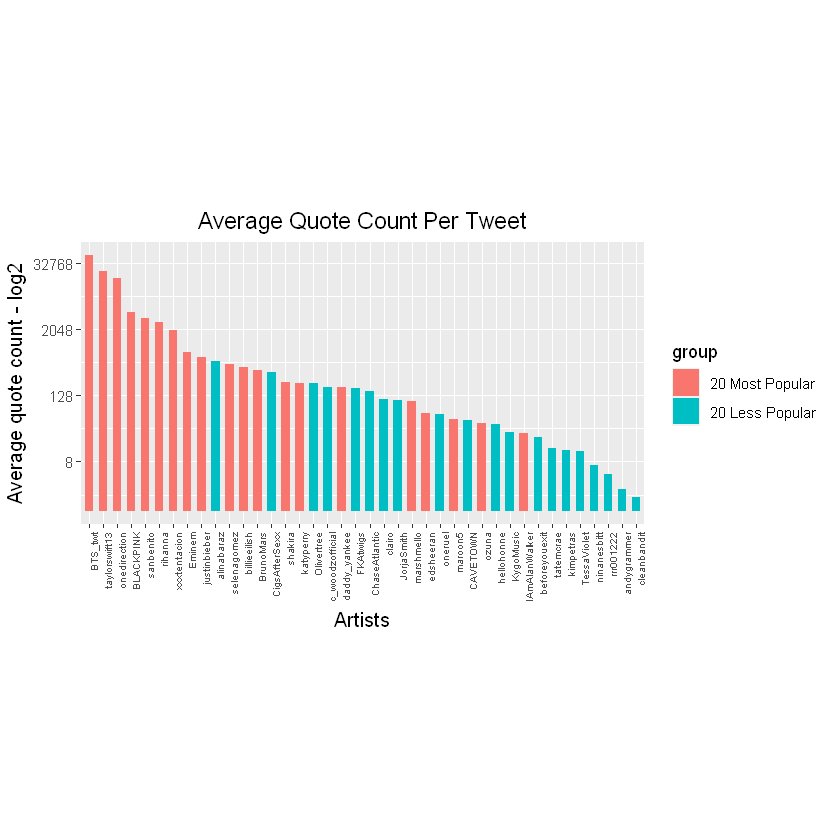

In [92]:
follower_matrix %>%
  mutate(screen_name = fct_reorder(screen_name, desc(average_quote))) %>%
ggplot(aes(x=screen_name)) +
  theme_grey() +
  geom_col(aes(y=average_quote, fill=group), width=0.6) +
  #scale_y_log10() +
  #geom_bar(aes(y=followers_count), fill='blue', stat="identity", position = "dodge") +
  xlab("Artists") +
  ylab("Average quote count - log2") +
  theme(axis.title.x = element_text(size=12)) +
  theme(axis.text.x = element_text(size=6, angle = 90, vjust = 1, hjust = 1)) +
  theme(axis.title.y = element_text(size=12, vjust=2)) +
  theme(plot.title = element_text(size = 14, hjust = 0.5)) +
  theme(aspect.ratio=1/2) +
  ggtitle("Average Quote Count Per Tweet") +
  scale_y_continuous(trans = 'log2')
  #scale_y_continuous(labels = label_number(suffix = " K", scale = 1e-3), breaks = seq(0, 500000, by = 100000))  

Per Follower

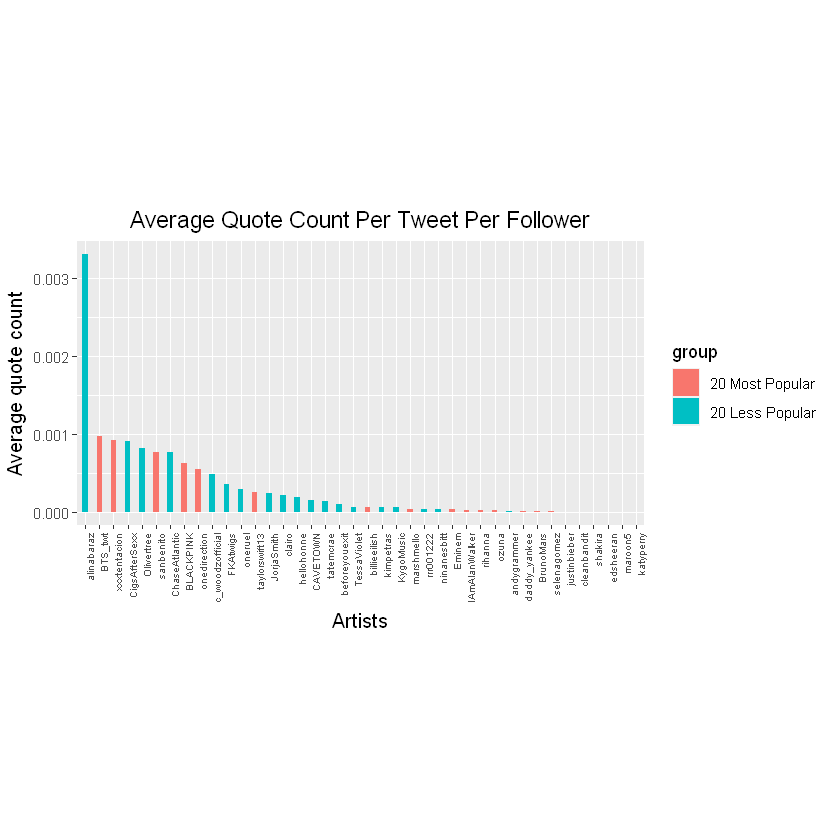

In [91]:
follower_matrix %>%
  mutate(screen_name = fct_reorder(screen_name, desc(average_quote/followers_count))) %>%
ggplot(aes(x=screen_name)) +
  theme_grey() +
  geom_col(aes(y=average_quote/followers_count, fill=group), width=0.4) +
  #scale_y_log10() +
  #geom_bar(aes(y=followers_count), fill='blue', stat="identity", position = "dodge") +
  xlab("Artists") +
  ylab("Average quote count") +
  theme(axis.title.x = element_text(size=12)) +
  theme(axis.text.x = element_text(size=6, angle = 90, vjust = 1, hjust = 1)) +
  theme(axis.title.y = element_text(size=12, vjust=2)) +
  theme(plot.title = element_text(size=14, hjust = 0.5)) +
  theme(aspect.ratio=1/2) +
  ggtitle("Average Quote Count Per Tweet Per Follower") #+
  #scale_y_continuous(trans = 'log2')
  #scale_y_continuous(labels = label_number(suffix = " K", scale = 1e-3), breaks = seq(0, 500000, by = 100000))  